In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transformedschool/transformeddata.csv


In [2]:
midata = pd.read_csv("/kaggle/input/transformedschool/transformeddata.csv")
print("Done")

Done


In [3]:
midata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   int64  
 1   school_accreditation   1000 non-null   int64  
 2   gender                 1000 non-null   int64  
 3   interest               1000 non-null   int64  
 4   residence              1000 non-null   int64  
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   int64  
 10  will_go_to_college     1000 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 86.1 KB


In [4]:
from sklearn.model_selection import train_test_split

X = midata.drop(columns=["will_go_to_college" ])
y = midata["will_go_to_college"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  
)
print("Done")

Done


In [5]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opentelemetry-sdk to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of cliff to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requireme

In [6]:

trainData = pd.concat([X_train, y_train], axis=1)
testData = pd.concat([X_test, y_test ], axis=1)
print("Done")

Done


In [7]:

backupTrainData = trainData
backupTestData = testData
print("Done 2")

Done 2


In [ ]:

from autogluon.tabular import TabularPredictor

label_column = "will_go_to_college"

predictor = TabularPredictor(label=label_column, eval_metric="roc_auc").fit(
    train_data = trainData,
    time_limit=600,
    presets = 'best_quality'
)
print("Done")

In [9]:

resultz = predictor.evaluate(testData)
print("Result: ", resultz)

Result:  {'roc_auc': np.float64(0.96255), 'accuracy': 0.89, 'balanced_accuracy': np.float64(0.89), 'mcc': np.float64(0.7825080450574997), 'f1': 0.8854166666666666, 'precision': 0.9239130434782609, 'recall': 0.85}


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       100
           1       0.92      0.85      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



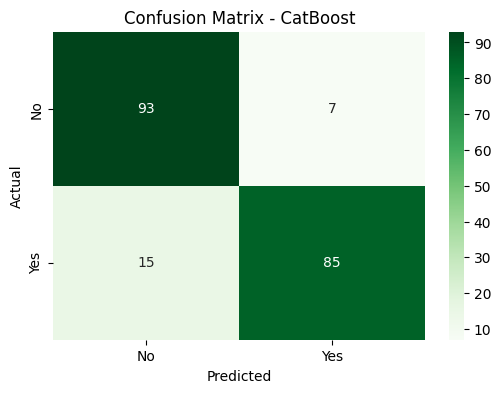

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Predict
y_pred = predictor.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - CatBoost')
plt.show()

In [11]:

predictor.leaderboard(testData, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest_r34_BAG_L2,0.96390,0.972775,roc_auc,0.316675,0.449122,3.137741,0.109036,0.151738,1.035158,2,True,30
1,ExtraTreesGini_BAG_L2,0.96330,0.970513,roc_auc,0.310906,0.447664,2.955856,0.103267,0.150279,0.853274,2,True,22
2,ExtraTrees_r49_BAG_L2,0.96330,0.970513,roc_auc,0.314248,0.437165,3.755006,0.106609,0.139780,1.652423,2,True,28
3,WeightedEnsemble_L2,0.96255,0.976400,roc_auc,0.210065,0.298003,2.127039,0.002426,0.000618,0.024457,2,True,19
4,ExtraTrees_r42_BAG_L1,0.96165,0.976291,roc_auc,0.106124,0.147067,1.191555,0.106124,0.147067,1.191555,1,True,5
5,WeightedEnsemble_L3,0.96165,0.976291,roc_auc,0.108516,0.147614,1.215777,0.002392,0.000547,0.024222,3,True,38
6,ExtraTrees_r126_BAG_L2,0.96150,0.972094,roc_auc,0.311158,0.444939,3.773546,0.103520,0.147554,1.670963,2,True,37
7,ExtraTreesEntr_BAG_L2,0.96140,0.970706,roc_auc,0.312155,0.447267,2.988979,0.104517,0.149883,0.886397,2,True,23
8,ExtraTrees_r4_BAG_L2,0.96060,0.973169,roc_auc,0.299656,0.439861,3.228458,0.092018,0.142477,1.125876,2,True,31
9,ExtraTrees_r197_BAG_L1,0.96020,0.972091,roc_auc,0.104634,0.147943,2.085835,0.104634,0.147943,2.085835,1,True,16


In [12]:
predictor.leaderboard(testData, extra_metrics=['accuracy', 'f1'])

,model,score_test,accuracy,f1,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest_r34_BAG_L2,0.96390,0.890,0.887755,0.972775,roc_auc,0.296214,0.449122,3.137741,0.090080,0.151738,1.035158,2,True,30
1,ExtraTreesGini_BAG_L2,0.96330,0.900,0.897959,0.970513,roc_auc,0.309510,0.447664,2.955856,0.103377,0.150279,0.853274,2,True,22
2,ExtraTrees_r49_BAG_L2,0.96330,0.900,0.897959,0.970513,roc_auc,0.309933,0.437165,3.755006,0.103800,0.139780,1.652423,2,True,28
3,WeightedEnsemble_L2,0.96255,0.890,0.885417,0.976400,roc_auc,0.209043,0.298003,2.127039,0.002910,0.000618,0.024457,2,True,19
4,ExtraTrees_r42_BAG_L1,0.96165,0.890,0.885417,0.976291,roc_auc,0.104043,0.147067,1.191555,0.104043,0.147067,1.191555,1,True,5
5,WeightedEnsemble_L3,0.96165,0.890,0.885417,0.976291,roc_auc,0.105993,0.147614,1.215777,0.001950,0.000547,0.024222,3,True,38
6,ExtraTrees_r126_BAG_L2,0.96150,0.890,0.886598,0.972094,roc_auc,0.306322,0.444939,3.773546,0.100188,0.147554,1.670963,2,True,37
7,ExtraTreesEntr_BAG_L2,0.96140,0.890,0.886598,0.970706,roc_auc,0.318578,0.447267,2.988979,0.112445,0.149883,0.886397,2,True,23
8,ExtraTrees_r4_BAG_L2,0.96060,0.890,0.886598,0.973169,roc_auc,0.295829,0.439861,3.228458,0.089695,0.142477,1.125876,2,True,31
9,ExtraTrees_r197_BAG_L1,0.96020,0.885,0.880829,0.972091,roc_auc,0.103408,0.147943,2.085835,0.103408,0.147943,2.085835,1,True,16
